In [3]:
import frost2df

# Replace with your own User-Agent. See MET API Terms of Service for correct User-Agents.



ImportError: attempted relative import with no known parent package

In [3]:
import metno

In [4]:
params = {
    "lat": 61.98,
    "lon": 7.33
}

In [17]:
data = metno.MetWeatherData(params)

RuntimeError: This event loop is already running

In [5]:
import pytz
from aiohttp import ClientSession


In [6]:


# Define your location's coordinates
urlparams = {
    'lat': '59.91',  # Latitude
    'lon': '10.75',  # Longitude
}

# Create an asynchronous web session
async with ClientSession() as session:
    met_weather_data = metno.MetWeatherData(urlparams, websession=session)

In [7]:
met_weather_data.fetching_data()

<coroutine object MetWeatherData.fetching_data at 0x000001FC18EC3AB0>

In [8]:


# Get current weather
current_weather = met_weather_data.get_current_weather()

# Get forecast (for example, hourly for the next 24 hours)
forecast_data = met_weather_data.get_forecast(pytz.timezone('Europe/Oslo'), hourly=True, range_start=1, range_stop=24)

In [9]:
print(forecast_data)

[]


In [10]:
import asyncio
from aiohttp import ClientSession
from metno import MetWeatherData  # Replace 'your_module' with the actual module name

async def main():
    # Define your location's coordinates
    urlparams = {'lat': '61.98', 'lon': '10.75'}  # Example coordinates

    # Create an asynchronous web session and fetch weather data
    async with ClientSession() as session:
        met_weather_data = MetWeatherData(urlparams, websession=session)
        await met_weather_data.fetching_data()

        # Get current weather or forecast
        current_weather = met_weather_data.get_current_weather()
        print(current_weather)
        # Add more processing as needed...

# Run the main coroutine
asyncio.run(main())

RuntimeError: asyncio.run() cannot be called from a running event loop

In [14]:
from metno_locationforecast import Place, Forecast
user_agent = "Stedspesifikk v/0.1 jan.helge.aalbu@vegvesen.no"

In [15]:
kvitenova = Place("New York", 61.98, 7.33, 10)

In [16]:
kvitenova_forecast = Forecast(kvitenova, user_agent)

In [17]:
kvitenova_forecast.update()

'Data-Modified'

In [46]:
from pprint import pprint
import matplotlib.pyplot as plt

In [22]:
print(kvitenova_forecast)

Forecast for New York:
	Forecast between 2023-12-11 09:00:00 and 2023-12-11 10:00:00:
		air_pressure_at_sea_level: 1004.9hPa
		air_temperature: -1.8celsius
		cloud_area_fraction: 0.0%
		relative_humidity: 71.5%
		wind_from_direction: 118.6degrees
		wind_speed: 6.3m/s
		precipitation_amount: 0.0mm
	Forecast between 2023-12-11 10:00:00 and 2023-12-11 11:00:00:
		air_pressure_at_sea_level: 1005.0hPa
		air_temperature: -1.7celsius
		cloud_area_fraction: 0.0%
		relative_humidity: 71.3%
		wind_from_direction: 115.9degrees
		wind_speed: 6.2m/s
		precipitation_amount: 0.0mm
	Forecast between 2023-12-11 11:00:00 and 2023-12-11 12:00:00:
		air_pressure_at_sea_level: 1005.0hPa
		air_temperature: -1.7celsius
		cloud_area_fraction: 0.0%
		relative_humidity: 71.2%
		wind_from_direction: 106.3degrees
		wind_speed: 6.0m/s
		precipitation_amount: 0.0mm
	Forecast between 2023-12-11 12:00:00 and 2023-12-11 13:00:00:
		air_pressure_at_sea_level: 1005.1hPa
		air_temperature: -1.4celsius
		cloud_area_fracti

In [23]:
vars(kvitenova_forecast.data).keys()

dict_keys(['last_modified', 'expires', 'updated_at', 'units', 'intervals'])

In [35]:
pprint(kvitenova_forecast.json_string)

('{"status_code":200,"headers":{"Server": "nginx/1.18.0 (Ubuntu)", "Date": '
 '"Mon, 11 Dec 2023 09:53:10 GMT", "Content-Type": "application/json", '
 '"Content-Length": "2555", "Connection": "keep-alive", "Expires": "Mon, 11 '
 'Dec 2023 10:24:44 GMT", "Last-Modified": "Mon, 11 Dec 2023 09:53:10 GMT", '
 '"X-Backend-Host": "b_157_249_76_16_loc", "Access-Control-Allow-Origin": "*", '
 '"Access-Control-Allow-Methods": "GET", "Access-Control-Allow-Headers": '
 '"Origin", "Content-Encoding": "gzip", "Vary": "Accept, Accept-Encoding", '
 '"X-Varnish": "473995937", "Age": "0", "Via": "1.1 varnish (Varnish/7.0)", '
 '"Accept-Ranges": '
 '"bytes"},"data":{"type":"Feature","geometry":{"type":"Point","coordinates":[7.33,61.98,10]},"properties":{"meta":{"updated_at":"2023-12-11T09:37:17Z","units":{"air_pressure_at_sea_level":"hPa","air_temperature":"celsius","cloud_area_fraction":"%","precipitation_amount":"mm","relative_humidity":"%","wind_from_direction":"degrees","wind_speed":"m/s"}},"timeser

In [55]:
tidspunkt_temp = []
tidspunkt_nedbor = []
temperatur = []
nedbor = []
for i in kvitenova_forecast.data.intervals:
    print(i.variables.keys())
    try:
        temperatur.append(i.variables['air_temperature'].value)
        tidspunkt_temp.append(i.start_time)
    except:
        continue
    try:
        nedbor.append(i.variables['precipitation_amount'].value)
        tidspunkt_nedbor.append(i.start_time)
    except:
        continue




dict_keys(['air_pressure_at_sea_level', 'air_temperature', 'cloud_area_fraction', 'relative_humidity', 'wind_from_direction', 'wind_speed', 'precipitation_amount'])
dict_keys(['air_pressure_at_sea_level', 'air_temperature', 'cloud_area_fraction', 'relative_humidity', 'wind_from_direction', 'wind_speed', 'precipitation_amount'])
dict_keys(['air_pressure_at_sea_level', 'air_temperature', 'cloud_area_fraction', 'relative_humidity', 'wind_from_direction', 'wind_speed', 'precipitation_amount'])
dict_keys(['air_pressure_at_sea_level', 'air_temperature', 'cloud_area_fraction', 'relative_humidity', 'wind_from_direction', 'wind_speed', 'precipitation_amount'])
dict_keys(['air_pressure_at_sea_level', 'air_temperature', 'cloud_area_fraction', 'relative_humidity', 'wind_from_direction', 'wind_speed', 'precipitation_amount'])
dict_keys(['air_pressure_at_sea_level', 'air_temperature', 'cloud_area_fraction', 'relative_humidity', 'wind_from_direction', 'wind_speed', 'precipitation_amount'])
dict_keys(

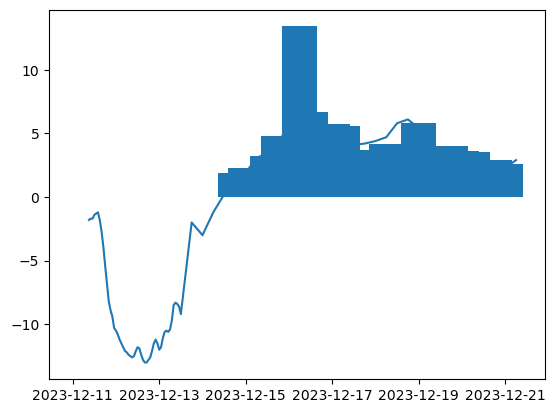

In [59]:
plt.plot(tidspunkt_temp, temperatur)
plt.bar(tidspunkt_nedbor, nedbor)
plt.show()

In [60]:
from regobslib import *

In [61]:
connection = Connection(prod=True)
results = connection.search(SnowRegistration, regions=[SnowRegion.OFOTEN], observation_types=[Weather])

print(f"Length of results: {len(results)}\n")

print("First result")
print(results[0])

print("\nIterates over results")
for result in results:
    print(f"Id: {result.id}, Observer: {result.observer.nickname}, Date: {result.obs_time}")

Length of results: 3147

First result
{'avalanche_activities': [{'avalanche_type': 0,
                           'comment': None,
                           'distribution': 0,
                           'elevation': {'elev_max': 0,
                                         'elev_min': 0,
                                         'format': 0},
                           'end': None,
                           'expositions': None,
                           'quantity': <Quantity.NO_ACTIVITY: 1>,
                           'sensitivity': 0,
                           'size': 0,
                           'start': None}],
 'avalanche_obs': None,
 'avalanche_problems': [],
 'compression_tests': [],
 'danger_assessment': {'comment': None,
                       'danger_assessment': 'Liten skredfare (vurdert fra '
                                            'veg). Lite snø . ',
                       'danger_development': 'Uforandret skredfare neste '
                                           

KeyboardInterrupt: 

In [1]:
from frost2df import obs2df, frost2df
client_id = '382037b2-96a7-4bb7-adfe-5ccb4986aa46'
client_secret = 'b51c5973-07ce-4b79-a71f-a817662cc9b3'
stasjonsid = 58705

In [2]:
from datetime import datetime, timedelta

In [79]:
now = datetime.now().replace(minute=0, second=0, microsecond=0)

# Get a date a certain number of days earlier
days_earlier = 5  # Change this to the number of days you want
earlier_date = now - timedelta(days=days_earlier)

# Convert the dates to strings in the format 'YYYY-MM-DDTHH:MM:SS'
now_str = now.isoformat()
earlier_date_str = earlier_date.isoformat()

print('Now:', now_str)
print('Earlier date:', earlier_date_str)

Now: 2023-12-11T17:00:00
Earlier date: 2023-12-06T17:00:00


In [94]:

parameters = {
    'sources':'SN58703',
    'elements': 'wind_speed, air_temperature, wind_from_direction, sum(precipitation_amount PT10M)',
    'referencetime': earlier_date_str + '/' + now_str,
    'timeoffsets': 'PT0H'
}
df = obs2df(parameters=parameters, verbose=True)

grouped = df.groupby('elementId')

wind_speed_df = grouped.get_group('wind_speed')
air_temperature_df = grouped.get_group('air_temperature')
wind_from_direction_df = grouped.get_group('wind_from_direction')

https://frost.met.no/observations/v0.jsonld?sources=SN58703&elements=wind_speed%2C+air_temperature%2C+wind_from_direction%2C+sum%28precipitation_amount+PT10M%29&referencetime=2023-12-06T17%3A00%3A00%2F2023-12-11T17%3A00%3A00&timeoffsets=PT0H


In [95]:
display(df)

,sourceId,elementId,referenceTime,value,unit,qualityCode,timeOffset,timeResolution,level.value
0,SN58703:0,wind_speed,2023-12-06 17:00:00+00:00,2.9,m/s,0,PT0H,PT10M,10.0
1,SN58703:0,air_temperature,2023-12-06 17:00:00+00:00,-7.9,degC,0,PT0H,PT10M,2.0
2,SN58703:0,wind_from_direction,2023-12-06 17:00:00+00:00,327.0,degrees,0,PT0H,PT10M,10.0
3,SN58703:0,sum(precipitation_amount PT10M),2023-12-06 17:00:00+00:00,0.0,mm,0,PT0H,PT10M,NaN
4,SN58703:0,wind_speed,2023-12-06 17:10:00+00:00,3.3,m/s,0,PT0H,PT10M,10.0
...,...,...,...,...,...,...,...,...,...
2859,SN58703:0,sum(precipitation_amount PT10M),2023-12-11 16:40:00+00:00,0.0,mm,0,PT0H,PT10M,NaN
2860,SN58703:0,wind_speed,2023-12-11 16:50:00+00:00,4.2,m/s,0,PT0H,PT10M,10.0
2861,SN58703:0,air_temperature,2023-12-11 16:50:00+00:00,-5.4,degC,0,PT0H,PT10M,2.0
2862,SN58703:0,wind_from_direction,2023-12-11 16:50:00+00:00,317.0,degrees,0,PT0H,PT10M,10.0


In [87]:
display(wind_speed_df)

,sourceId,elementId,referenceTime,value,unit,qualityCode,timeOffset,timeResolution,level.value
0,SN58705:0,wind_speed,2023-12-06 17:00:00+00:00,0.7,m/s,0,PT0H,PT10M,10
3,SN58705:0,wind_speed,2023-12-06 17:10:00+00:00,0.7,m/s,0,PT0H,PT10M,10
6,SN58705:0,wind_speed,2023-12-06 17:20:00+00:00,0.8,m/s,0,PT0H,PT10M,10
9,SN58705:0,wind_speed,2023-12-06 17:30:00+00:00,0.9,m/s,0,PT0H,PT10M,10
12,SN58705:0,wind_speed,2023-12-06 17:40:00+00:00,0.7,m/s,0,PT0H,PT10M,10
...,...,...,...,...,...,...,...,...,...
1868,SN58705:0,wind_speed,2023-12-11 16:10:00+00:00,6.6,m/s,0,PT0H,PT10M,10
1871,SN58705:0,wind_speed,2023-12-11 16:20:00+00:00,6.8,m/s,0,PT0H,PT10M,10
1874,SN58705:0,wind_speed,2023-12-11 16:30:00+00:00,7.4,m/s,0,PT0H,PT10M,10
1877,SN58705:0,wind_speed,2023-12-11 16:40:00+00:00,6.9,m/s,0,PT0H,PT10M,10


In [10]:
available = frost2df('observations/availableTimeSeries', {'sources': 'SN58703'}).sort_values('validFrom')

In [11]:
display(available)

,sourceId,validFrom,validTo,timeOffset,timeResolution,timeSeriesId,elementId,unit,performanceCategory,exposureCategory,status,uri,level.levelType,level.unit,level.value
0,SN58703:0,2022-01-11T00:00:00.000Z,2022-02-28T00:00:00.000Z,PT0H,P1D,0,mean(relative_humidity P1D),percent,C,2,Authoritative,https://frost.met.no/observations/v0.jsonld?so...,height_above_ground,m,2.0
18,SN58703:0,2022-01-11T00:00:00.000Z,NaN,PT0H,PT10M,0,sum(precipitation_amount PT10M),mm,C,2,Authoritative,https://frost.met.no/observations/v0.jsonld?so...,NaN,NaN,NaN
2,SN58703:0,2022-01-11T00:00:00.000Z,NaN,PT0H,PT10M,0,wind_speed,m/s,C,2,Authoritative,https://frost.met.no/observations/v0.jsonld?so...,height_above_ground,m,10.0
3,SN58703:0,2022-01-11T00:00:00.000Z,NaN,PT0H,PT10M,0,dew_point_temperature,degC,C,2,Authoritative,https://frost.met.no/observations/v0.jsonld?so...,NaN,NaN,NaN
15,SN58703:0,2022-01-11T00:00:00.000Z,NaN,PT0H,PT10M,0,max(rainfall_rate PT1M),mm/h,C,2,Authoritative,https://frost.met.no/observations/v0.jsonld?so...,NaN,NaN,NaN
14,SN58703:0,2022-01-11T00:00:00.000Z,NaN,PT0H,PT10M,0,relative_humidity,percent,C,2,Authoritative,https://frost.met.no/observations/v0.jsonld?so...,height_above_ground,m,2.0
13,SN58703:0,2022-01-11T00:00:00.000Z,NaN,PT0H,PT10M,0,air_temperature,degC,C,2,Authoritative,https://frost.met.no/observations/v0.jsonld?so...,height_above_ground,m,2.0
7,SN58703:0,2022-01-11T00:00:00.000Z,NaN,PT0H,PT1H,0,sum(precipitation_amount PT1H),mm,C,2,Authoritative,https://frost.met.no/observations/v0.jsonld?so...,NaN,NaN,NaN
8,SN58703:0,2022-01-11T00:00:00.000Z,NaN,PT0H,PT10M,0,wind_from_direction,degrees,C,2,Authoritative,https://frost.met.no/observations/v0.jsonld?so...,height_above_ground,m,10.0
19,SN58703:0,2022-01-12T00:00:00.000Z,NaN,PT0H,P1D,0,integral_of_deficit(mean(air_temperature P1D) ...,degree-day,C,2,Authoritative,https://frost.met.no/observations/v0.jsonld?so...,height_above_ground,m,2.0


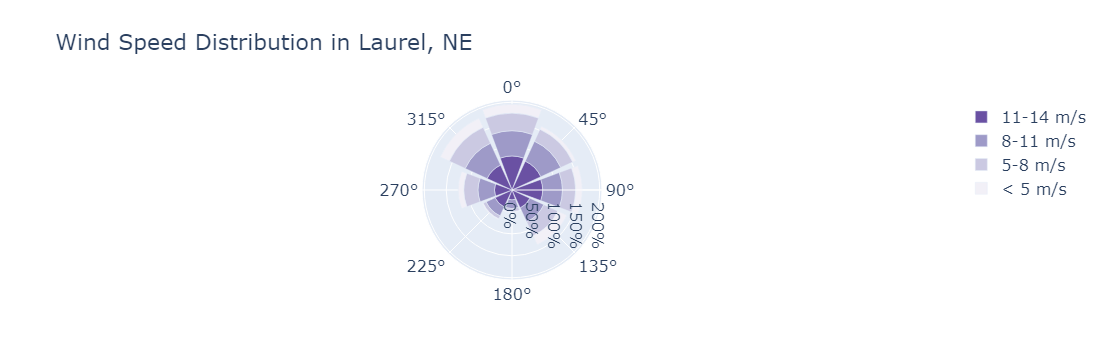

In [14]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Barpolar(
    r=[77.5, 72.5, 70.0, 45.0, 22.5, 42.5, 40.0, 62.5],
    name='11-14 m/s',
    marker_color='rgb(106,81,163)'
))
fig.add_trace(go.Barpolar(
    r=[57.5, 50.0, 45.0, 35.0, 20.0, 22.5, 37.5, 55.0],
    name='8-11 m/s',
    marker_color='rgb(158,154,200)'
))
fig.add_trace(go.Barpolar(
    r=[40.0, 30.0, 30.0, 35.0, 7.5, 7.5, 32.5, 40.0],
    name='5-8 m/s',
    marker_color='rgb(203,201,226)'
))
fig.add_trace(go.Barpolar(
    r=[20.0, 7.5, 15.0, 22.5, 2.5, 2.5, 12.5, 22.5],
    name='< 5 m/s',
    marker_color='rgb(242,240,247)'
))

fig.update_traces(text=['North', 'N-E', 'East', 'S-E', 'South', 'S-W', 'West', 'N-W'])
fig.update_layout(
    title='Wind Speed Distribution in Laurel, NE',
    font_size=16,
    legend_font_size=16,
    polar_radialaxis_ticksuffix='%',
    polar_angularaxis_direction='clockwise',
    polar_angularaxis_rotation=90,

)
fig.show()